- Ziel von 161 und 165: Reduktion der Setpoint-Changes in der Nacht
- Hinweis: Der Aktionsraum ist halbiert (nur 1 Grad Schritte möglich)
- Dies ist halbwegs erreicht, leider steigt der Energieverbrauch an, wenn man auf 2 Agenten mit RL-Steuerung umstellt
- Offenbar ist der Energieverbrauch nun zu schwach gewichtet

- längeres Training bei 161 hat zu **keiner** Verbesserung geführt - Das ist schlecht, heißt es doch, dass diesen Reward zu erlernen prinzipiell (unabhängig der Laufzeit) eine Herausforderung ist
  und längeres Training nicht automatisch zu besseren Ergebnissen führt

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 30

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s161/20210525-2147/",
            "../checkpoints/s161-longer/20210525-2150/",
            "../checkpoints/s165/20210525-2155/"]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.


In [10]:
vh.get_arguments_overview(dirnames)

b001  \
algorithm                        baseline_rule-based   
lr                                              0.01   
batch_size                                       128   
lambda_rwd_energy                              5e-06   
reward_offset                                    0.0   
stp_reward_step_offset                           0.0   
target_network_update_freq                         3   
epsilon_final_step                               100   
episodes_count                                   100   
agent_network                 2HiddenLayer,Trapezium   
agent_init_gain                                  0.8   
critic_hidden_size                                40   
critic_hidden_activation                        tanh   
critic_last_activation                          tanh   
agent_w_l2                                     1e-05   
network_storage_frequency                         10   
model                        Building_5ZoneAirCooled   
single_setpoint_agent_count                      all   
next_occ_horizont                                  0   

                                                               s161  \
algorithm                                                      ddqn   
lr                                                             0.08   
batch_size                                                      256   
lambda_rwd_energy                                              0.05   
reward_offset                                                   0.3   
stp_reward_step_offset                                          1.0   
target_network_update_freq                                        6   
epsilon_final_step                                            21600   
episodes_count                                                  160   
agent_network                           2HiddenLayer,Trapezium,SiLU   
agent_init_gain                                                 0.7   
critic_hidden_size                                              NaN   
critic_hidden_activation                                        NaN   
critic_last_activation                                          NaN   
agent_w_l2                                                    1e-06   
network_storage_frequency                                       160   
model                        Building_5ZoneAirCooled_SingleSetpoint   
single_setpoint_agent_count                                     one   
next_occ_horizont                                                 2   

                                                        s161-longer  \
algorithm                                                      ddqn   
lr                                                             0.05   
batch_size                                                      256   
lambda_rwd_energy                                              0.05   
reward_offset                                                   0.3   
stp_reward_step_offset                                          1.0   
target_network_update_freq                                        6   
epsilon_final_step                                            56000   
episodes_count                                                  160   
agent_network                           2HiddenLayer,Trapezium,SiLU   
agent_init_gain                                                 0.7   
critic_hidden_size                                              NaN   
critic_hidden_activation                                        NaN   
critic_last_activation                                          NaN   
agent_w_l2                                                    1e-06   
network_storage_frequency                                       160   
model                        Building_5ZoneAirCooled_SingleSetpoint   
single_setpoint_agent_count                                     one   
next_occ_horizont                                                 2   

                                                               s165  
algorithm      

In [11]:
vh.get_runtime_overview_df(alldfs, dirnames)

b001          s161  \
Number of training episodes                      1.0  21600.000000   
Runtime in s                                     0.0  99238.108361   
Runtime in h                                     0.0     27.566141   
Mean episode runtime in s                        0.0      4.594357   
Mean episode runtime during eval. episode in s   0.0      4.745858   
Mean episode runtime after eval. episode in s    NaN      4.557529   
Mean episode runtime in no eval. episode in s    NaN      4.593404   

                                                  s161-longer           s165  
Number of training episodes                      56000.000000   24800.000000  
Runtime in s                                    263818.612912  127151.161179  
Runtime in h                                        73.282948      35.319767  
Mean episode runtime in s                            4.711047       5.127063  
Mean episode runtime during eval. episode in s       4.930541       5.303387  
Mean episode runtime after eval. episode in s        4.658371       5.044923  
Mean episode runtime in no eval. episode in s        4.709666       5.125954

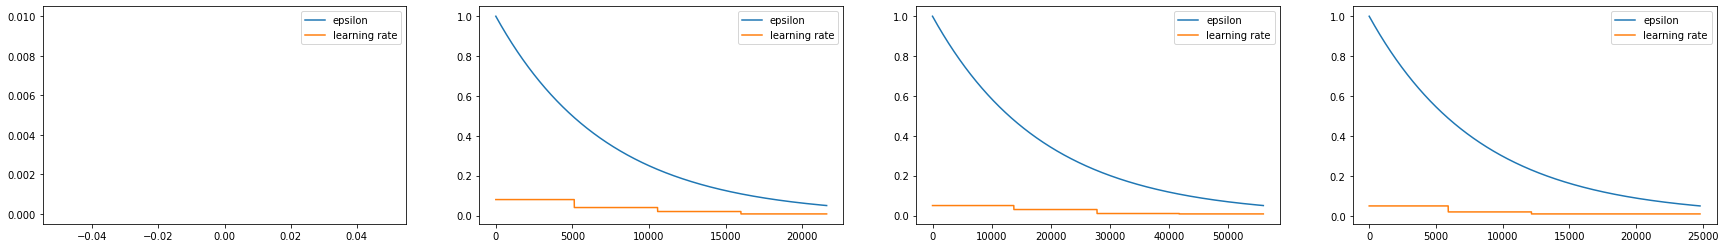

In [12]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

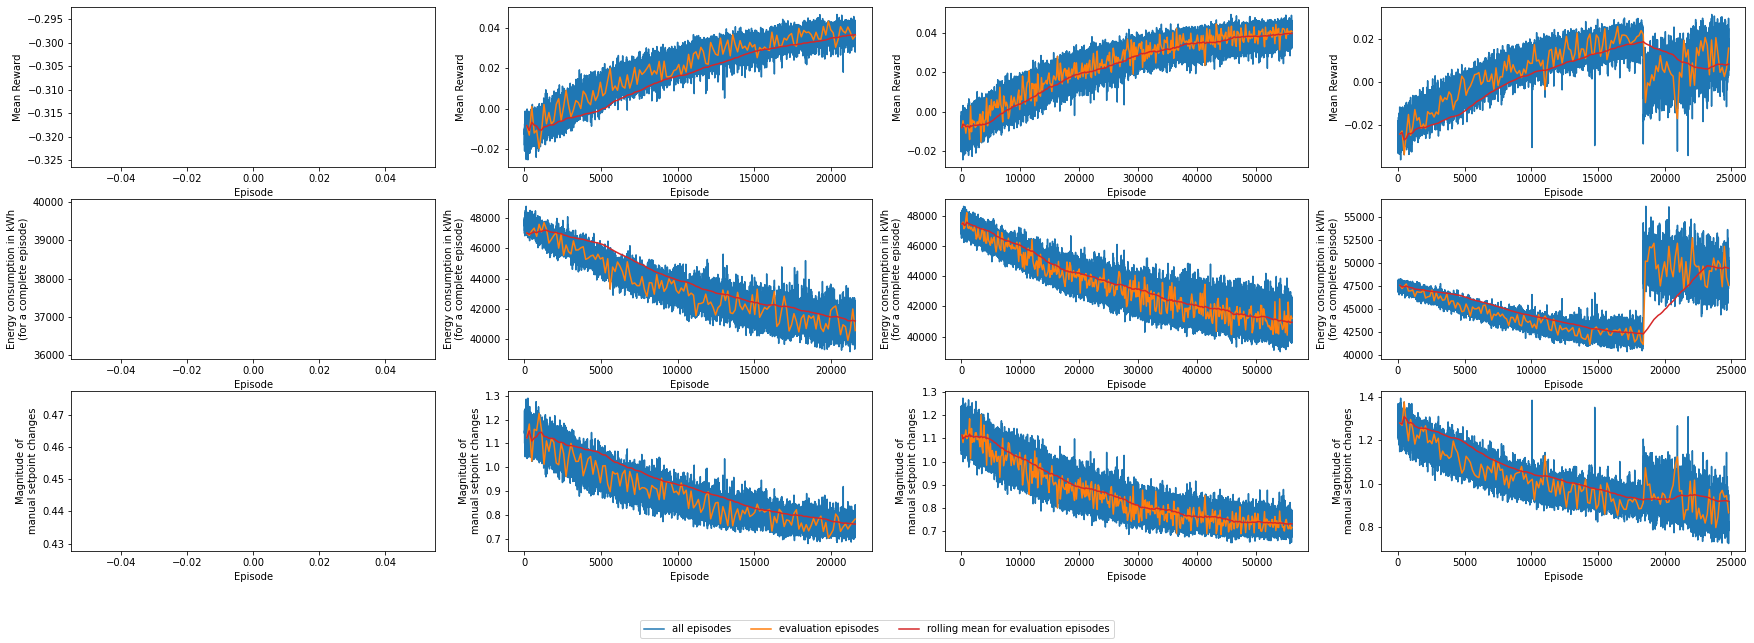

In [13]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

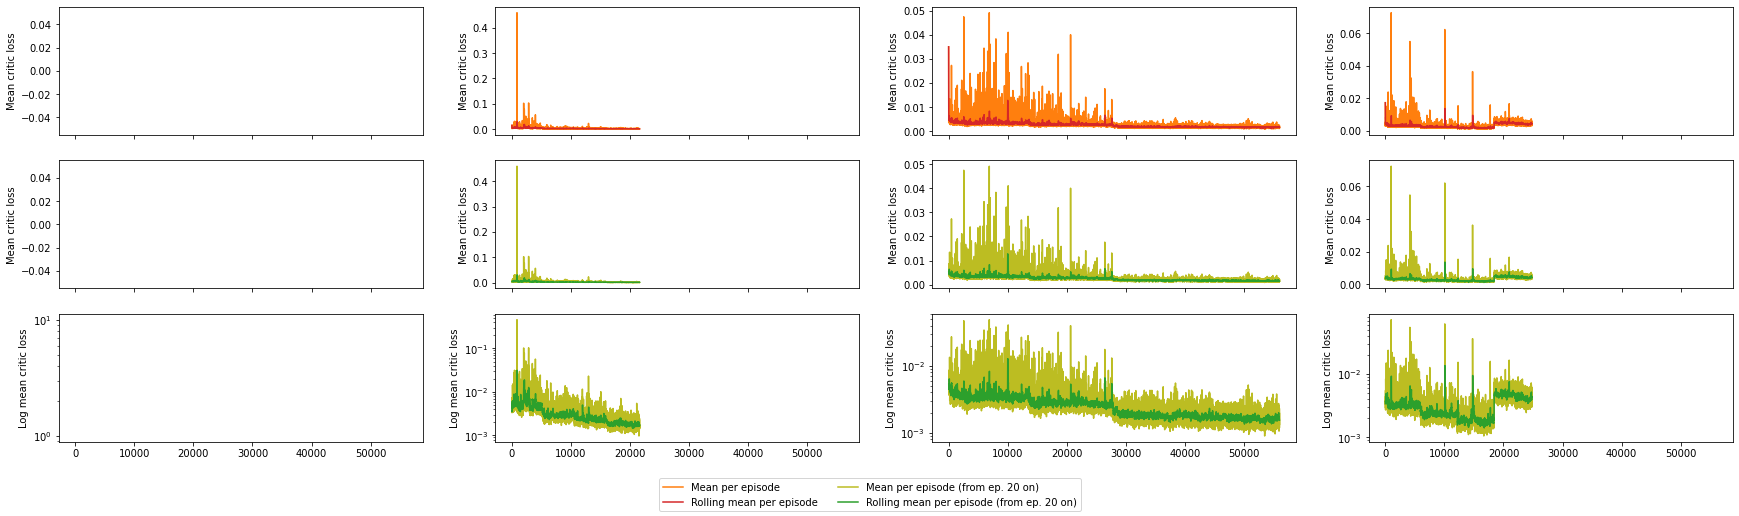

In [14]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

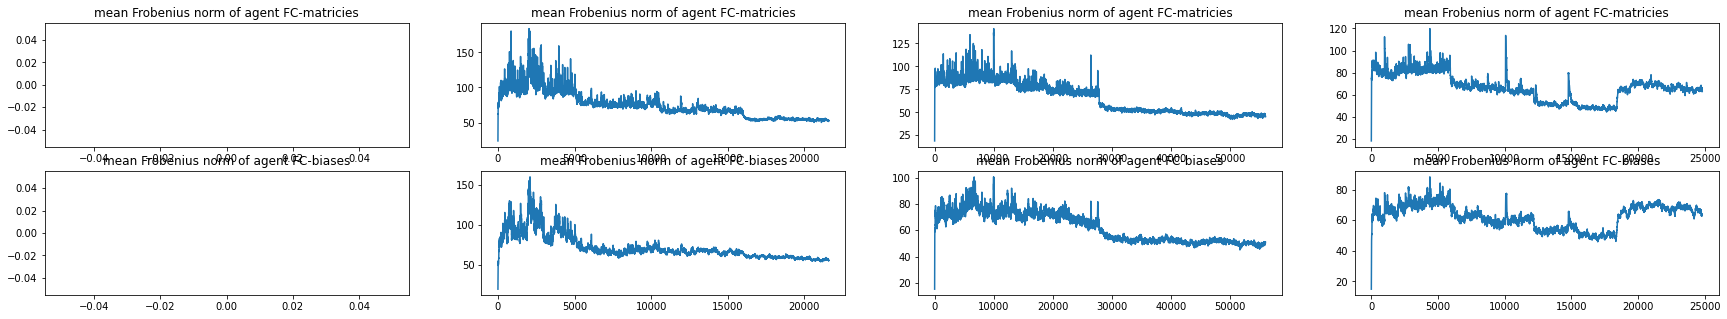

In [15]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [16]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  21599
Last available evaluation episode for dfs2:  55999
Last available evaluation episode for dfs3:  24799


<h3>Details for one week</h3>

In [17]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [18]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [19]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   37992.70 kWh; Numer of setpoint changes: 325.4346284463498
For episode 21599: Energy consumption:   40566.38 kWh; Numer of setpoint changes: 562.7148078071874
For episode 55999: Energy consumption:   41203.33 kWh; Numer of setpoint changes: 515.9871896116844
For episode 24799: Energy consumption:   47579.53 kWh; Numer of setpoint changes: 622.9446383421111

Mean values for episode ...
...     0: Reward: -0.30947 kWh; Setpoint change magnit.:  0.45262; Energy cons.: 52841.03202
... 21599: Reward:  0.03609 kWh; Setpoint change magnit.:  0.78264; Energy cons.: 56420.55061
... 55999: Reward:  0.04092 kWh; Setpoint change magnit.:  0.71765; Energy cons.: 57306.44554
... 24799: Reward:  0.01556 kWh; Setpoint change magnit.:  0.86640; Energy cons.: 66174.58369


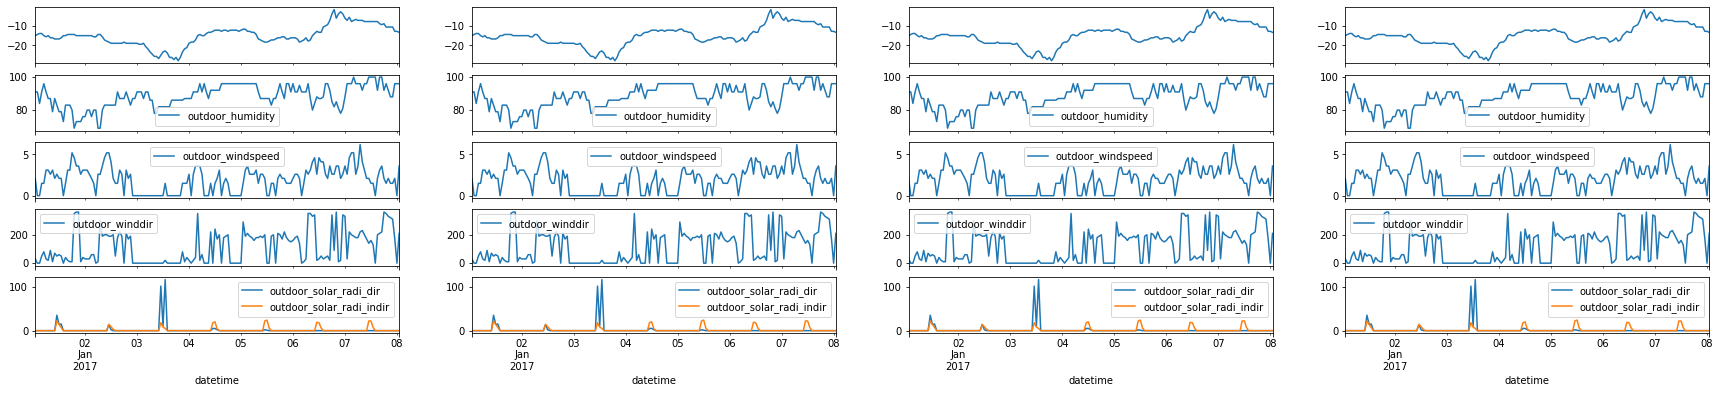

In [20]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

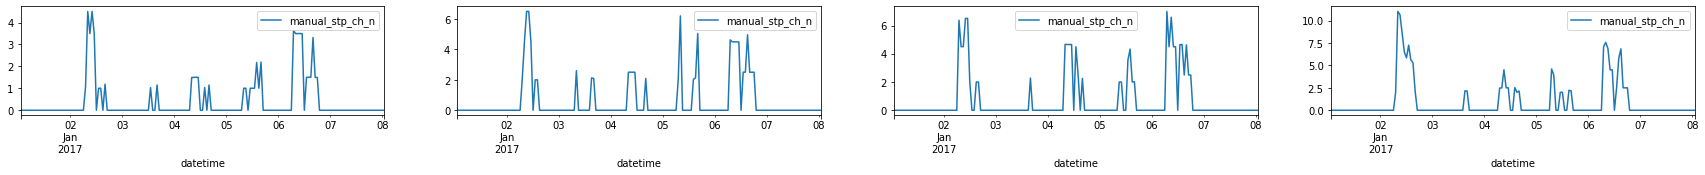

In [21]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

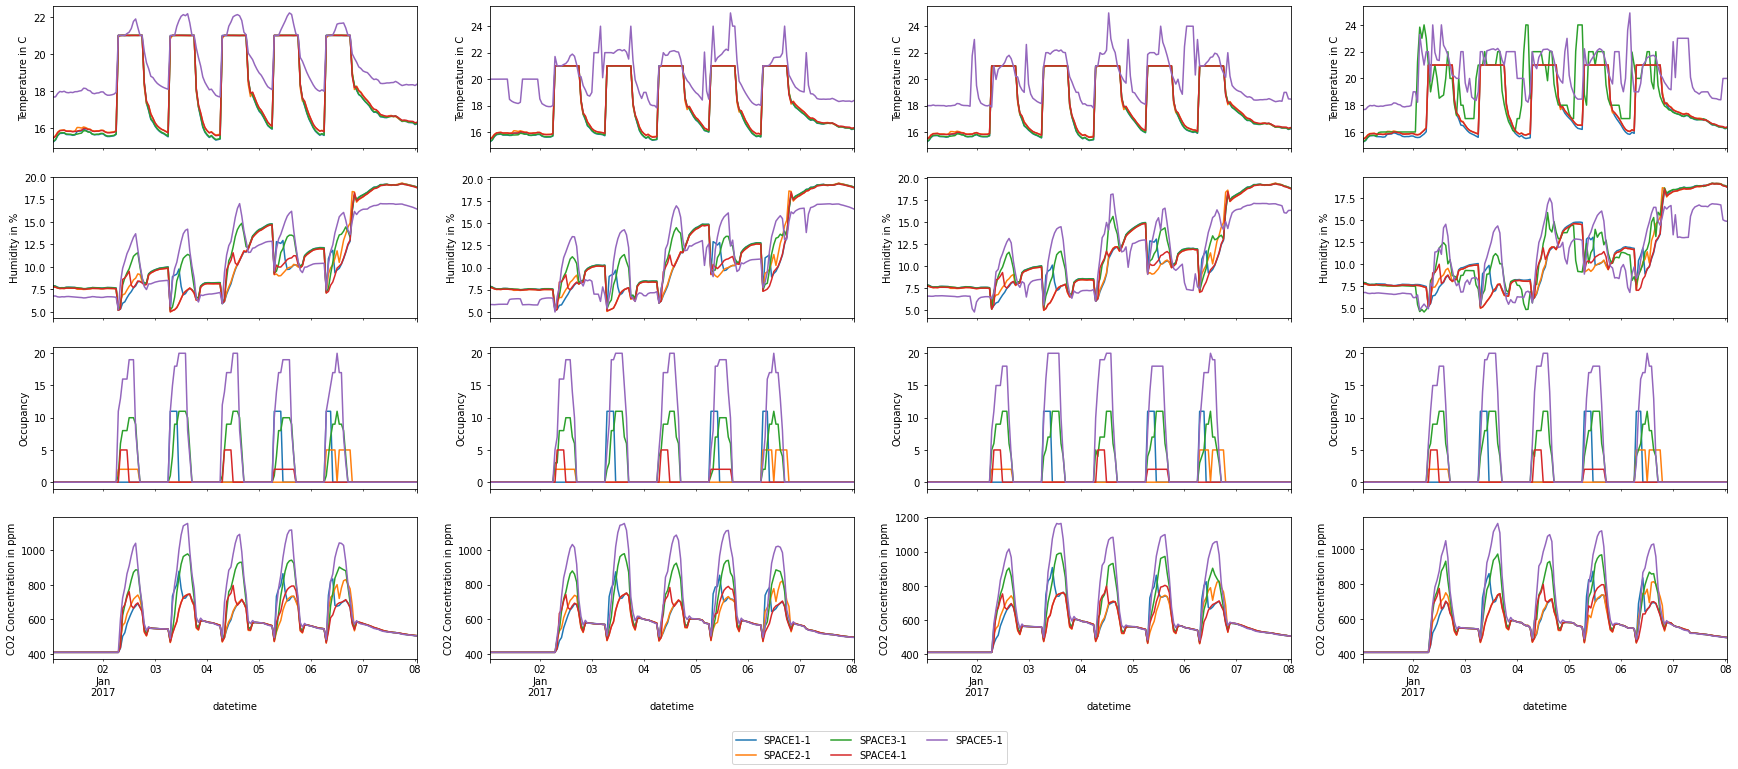

In [22]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [23]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

No agent - controlled device pairing found for index 0
Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: {'SPACE5-1': 0, 'SPACE4-1': 1, 'SPACE3-1': 2, 'SPACE2-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: {'SPACE5-1': 0, 'SPACE4-1': 1, 'SPACE3-1': 2, 'SPACE2-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: {'SPACE5-1': 0, 'SPACE3-1': 1, 'SPACE4-1': 2, 'SPACE2-1': 3, 'SPACE1-1': 4} 



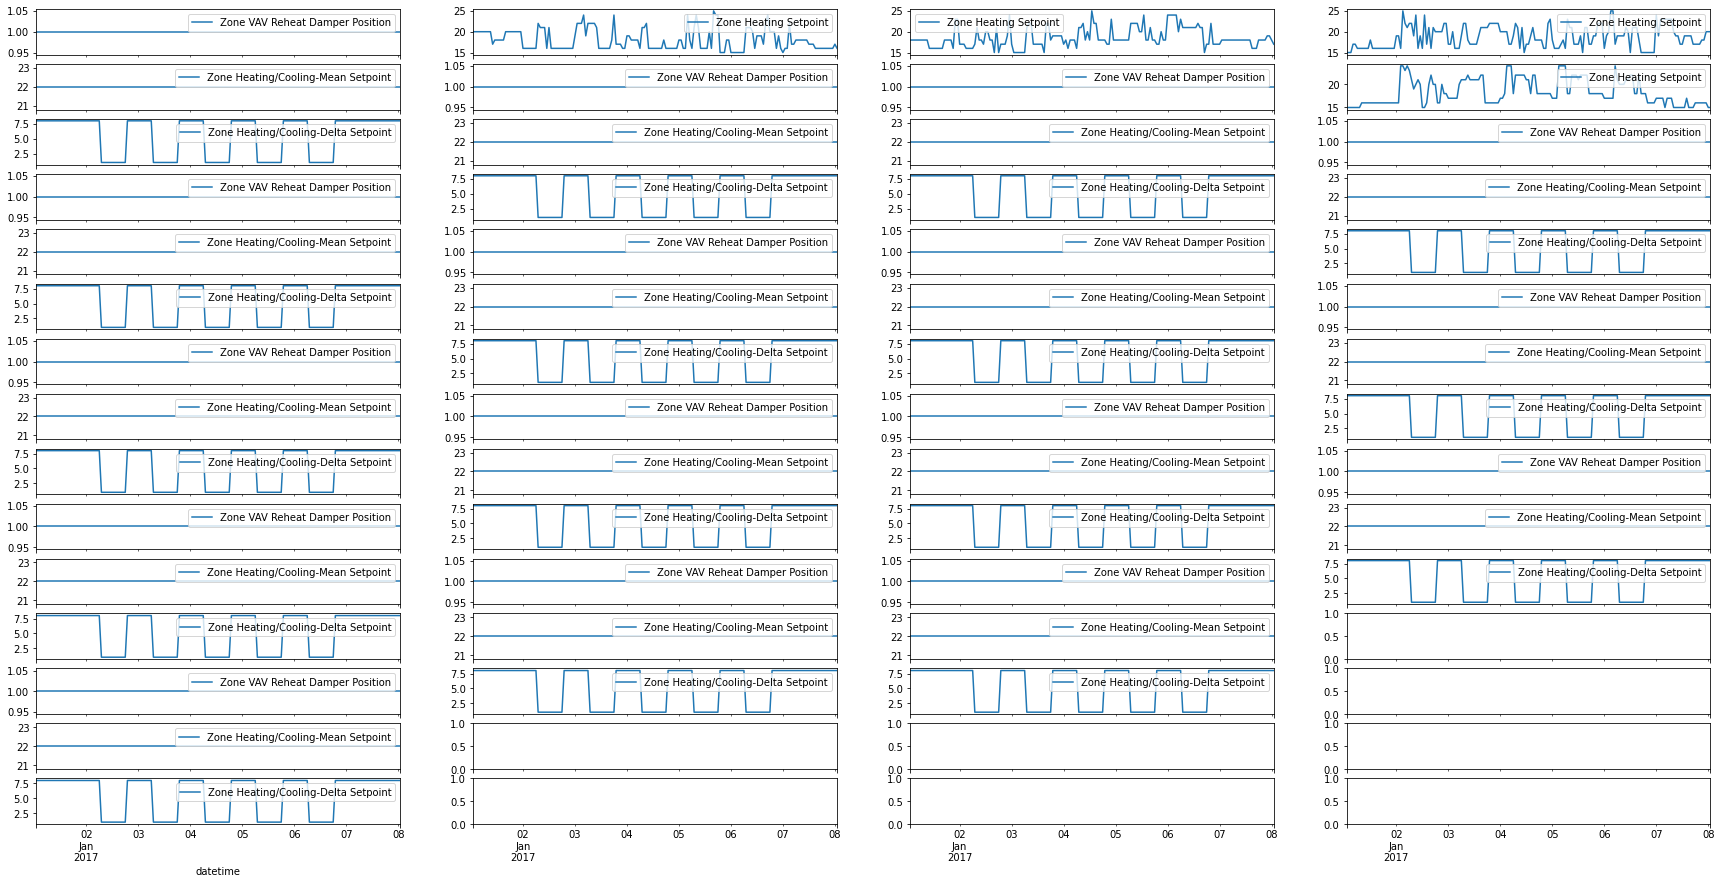

In [24]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

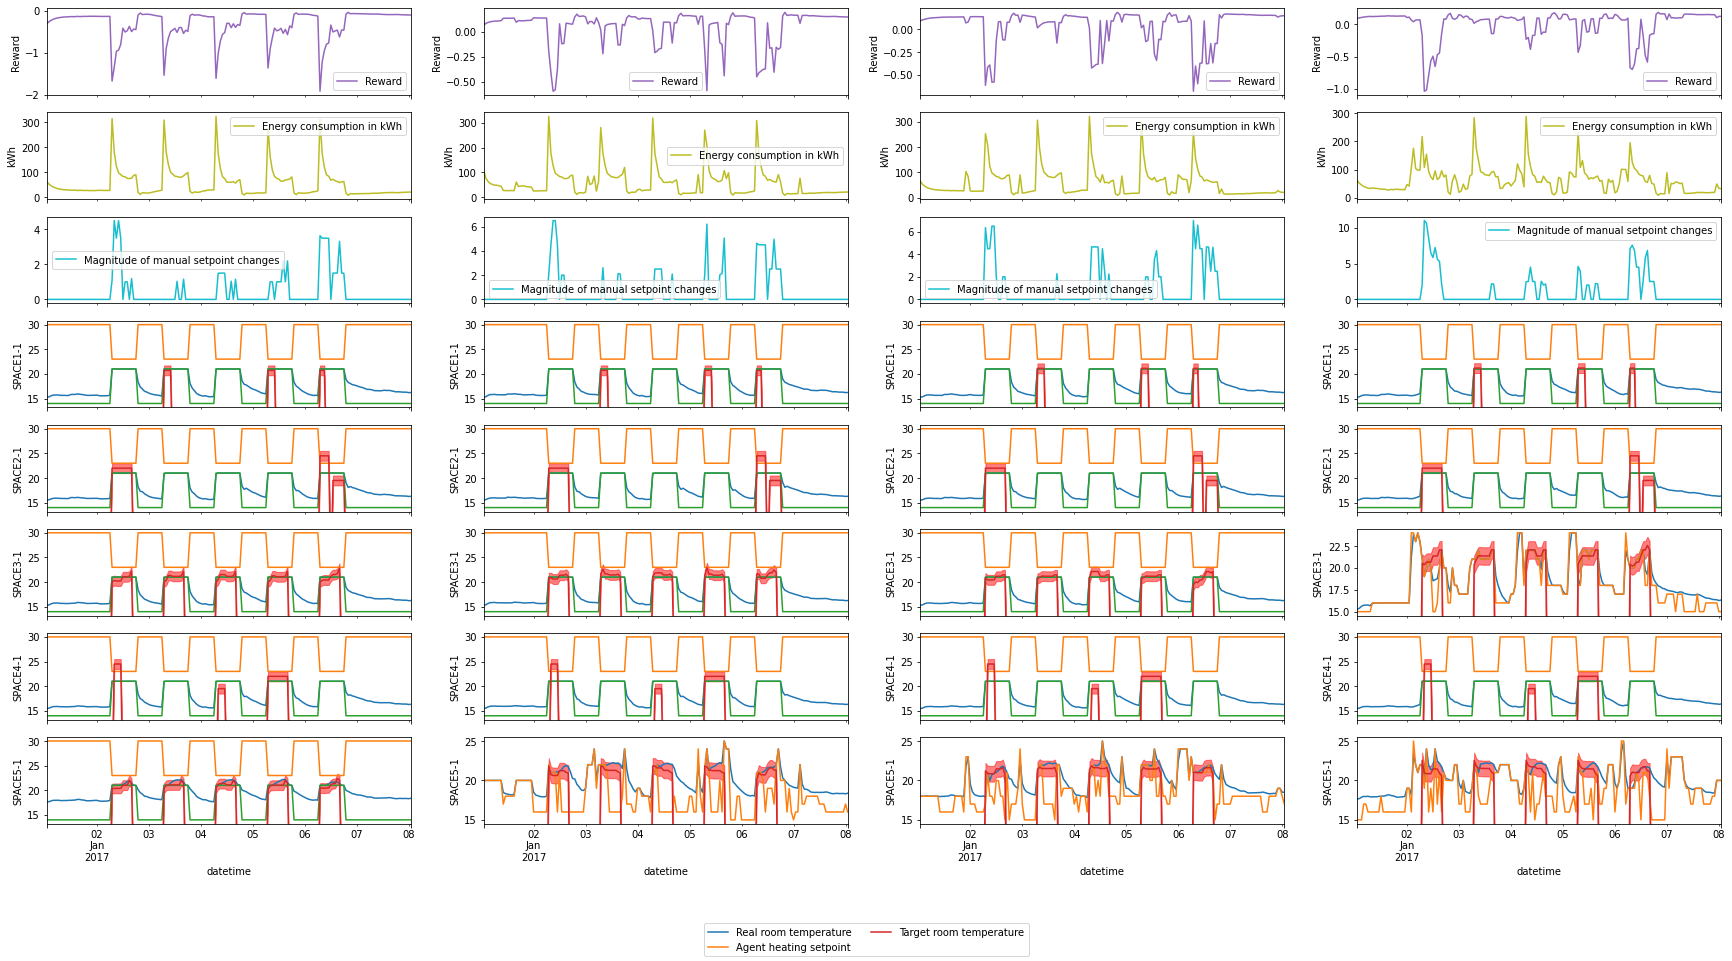

In [25]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [26]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [27]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

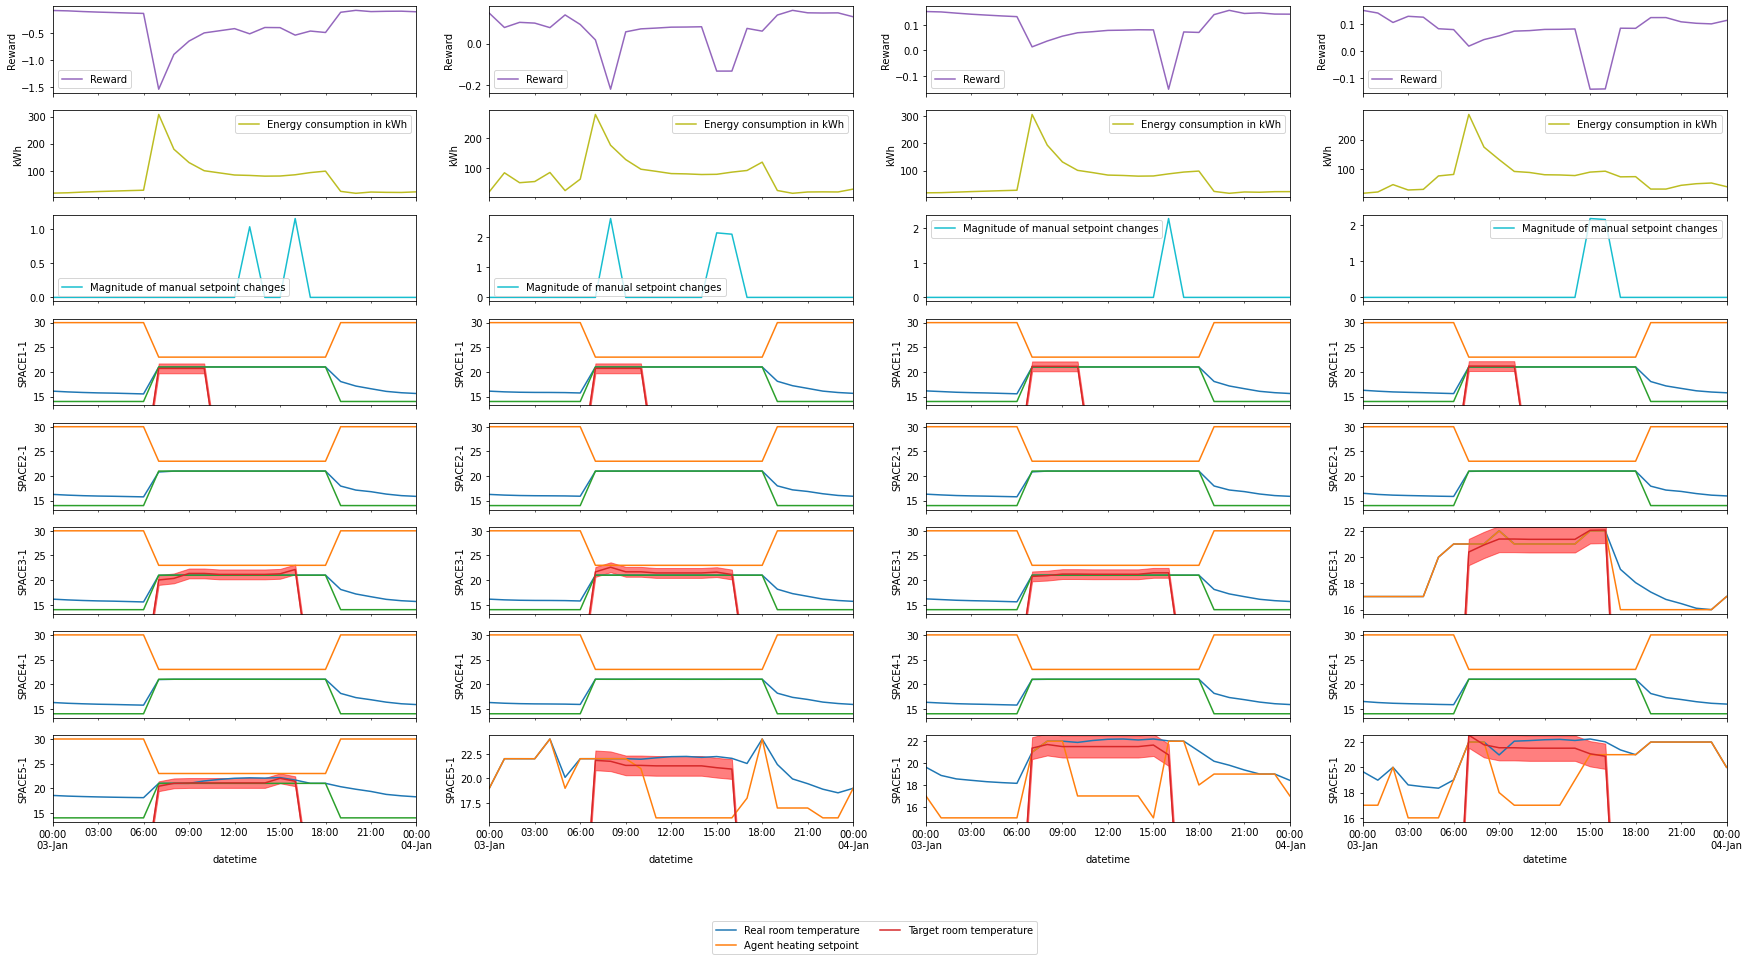

In [28]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [29]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [30]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  51941.5 Wh, mean reward = -0.3035
For plot number 2, mean energy consumption =  55626.6 Wh, mean reward =  0.0386
For plot number 3, mean energy consumption =  56592.1 Wh, mean reward =  0.0435
For plot number 4, mean energy consumption =  65032.9 Wh, mean reward =  0.0190


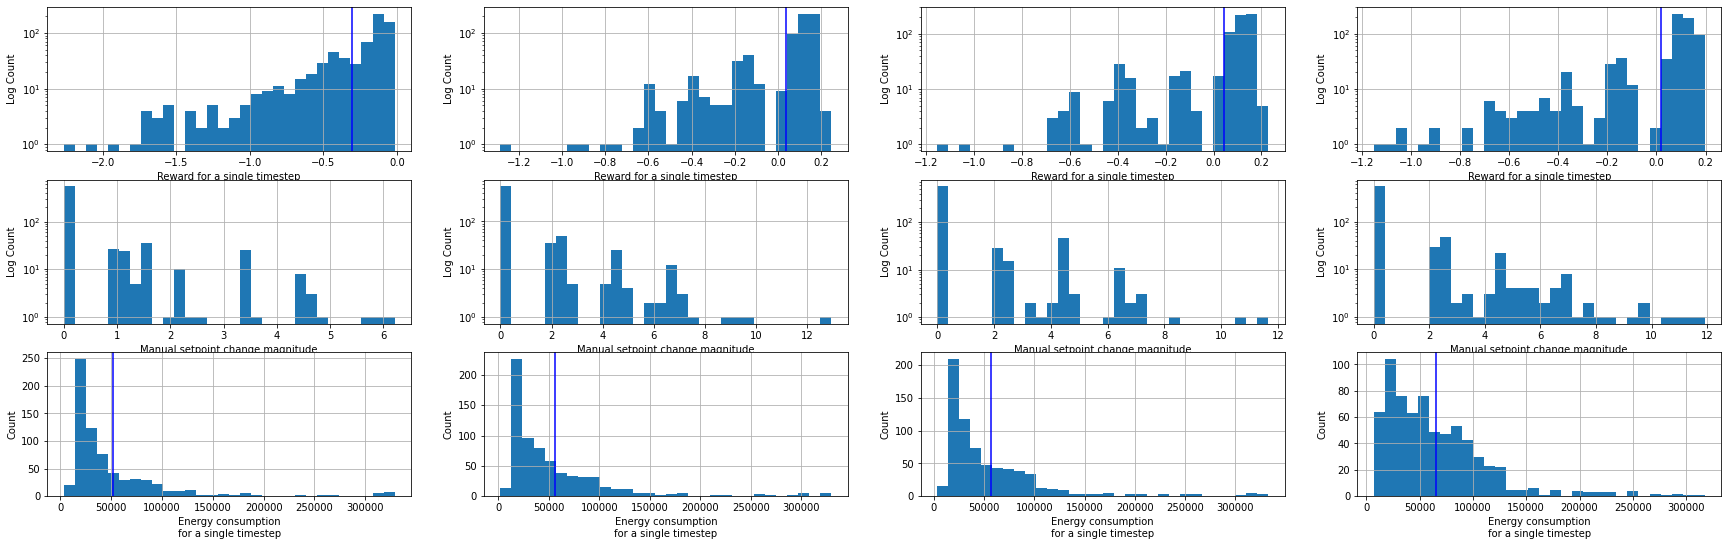

In [31]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

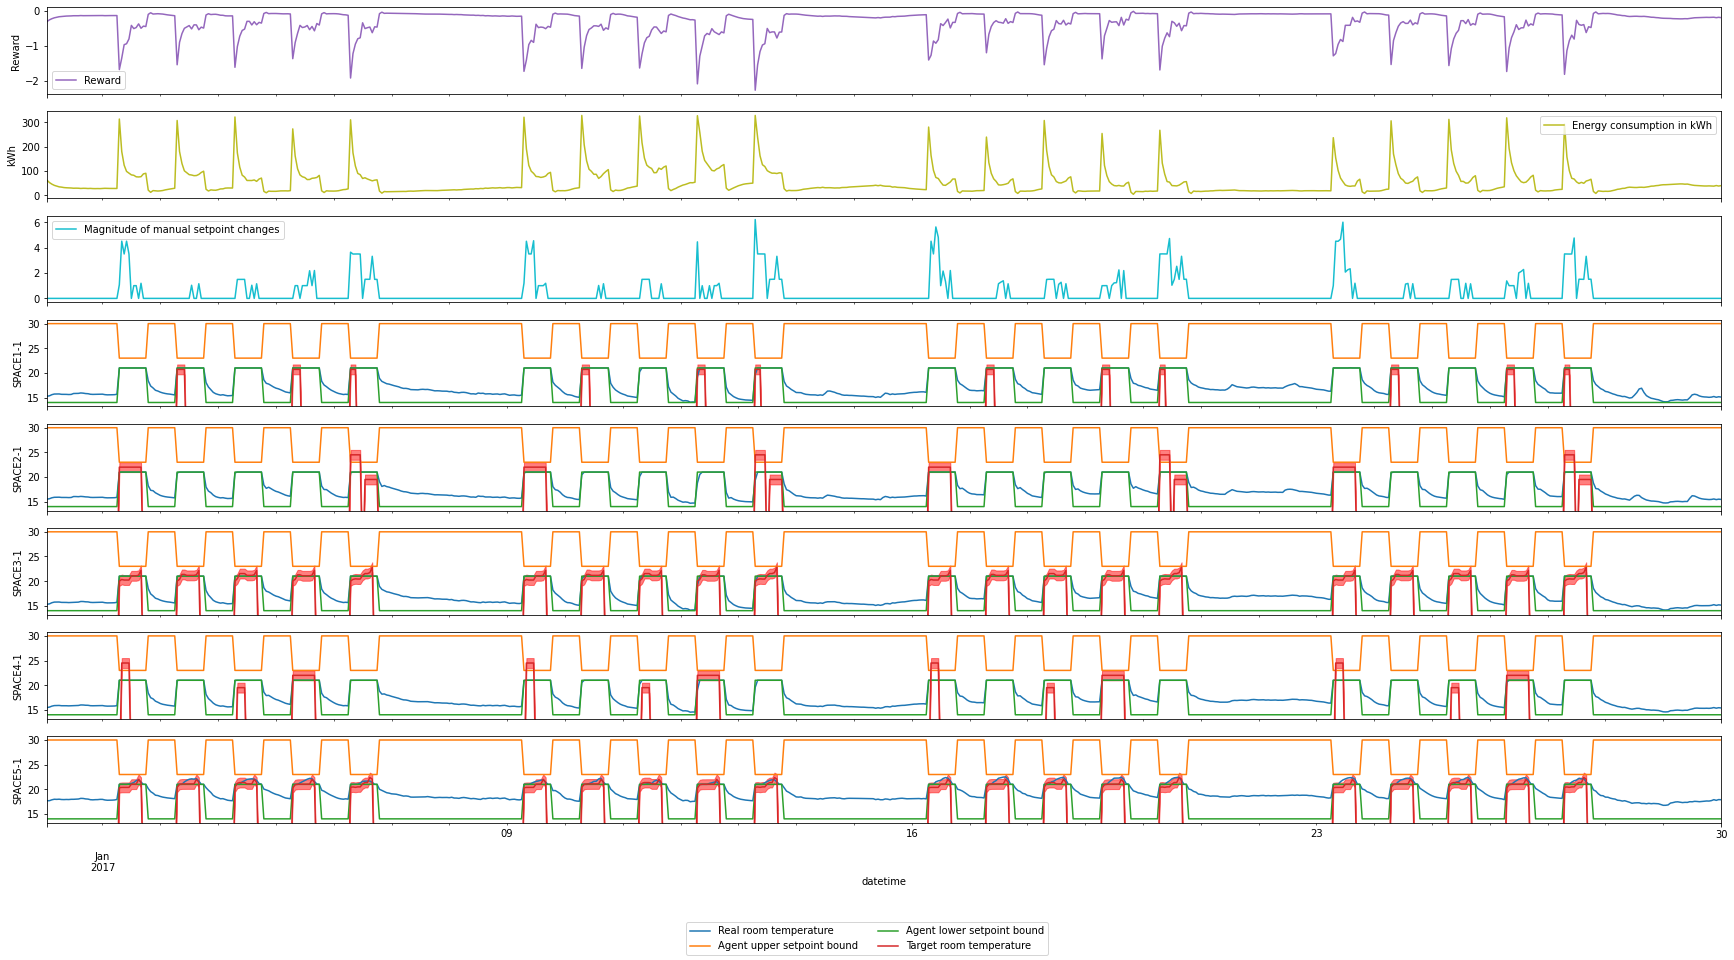

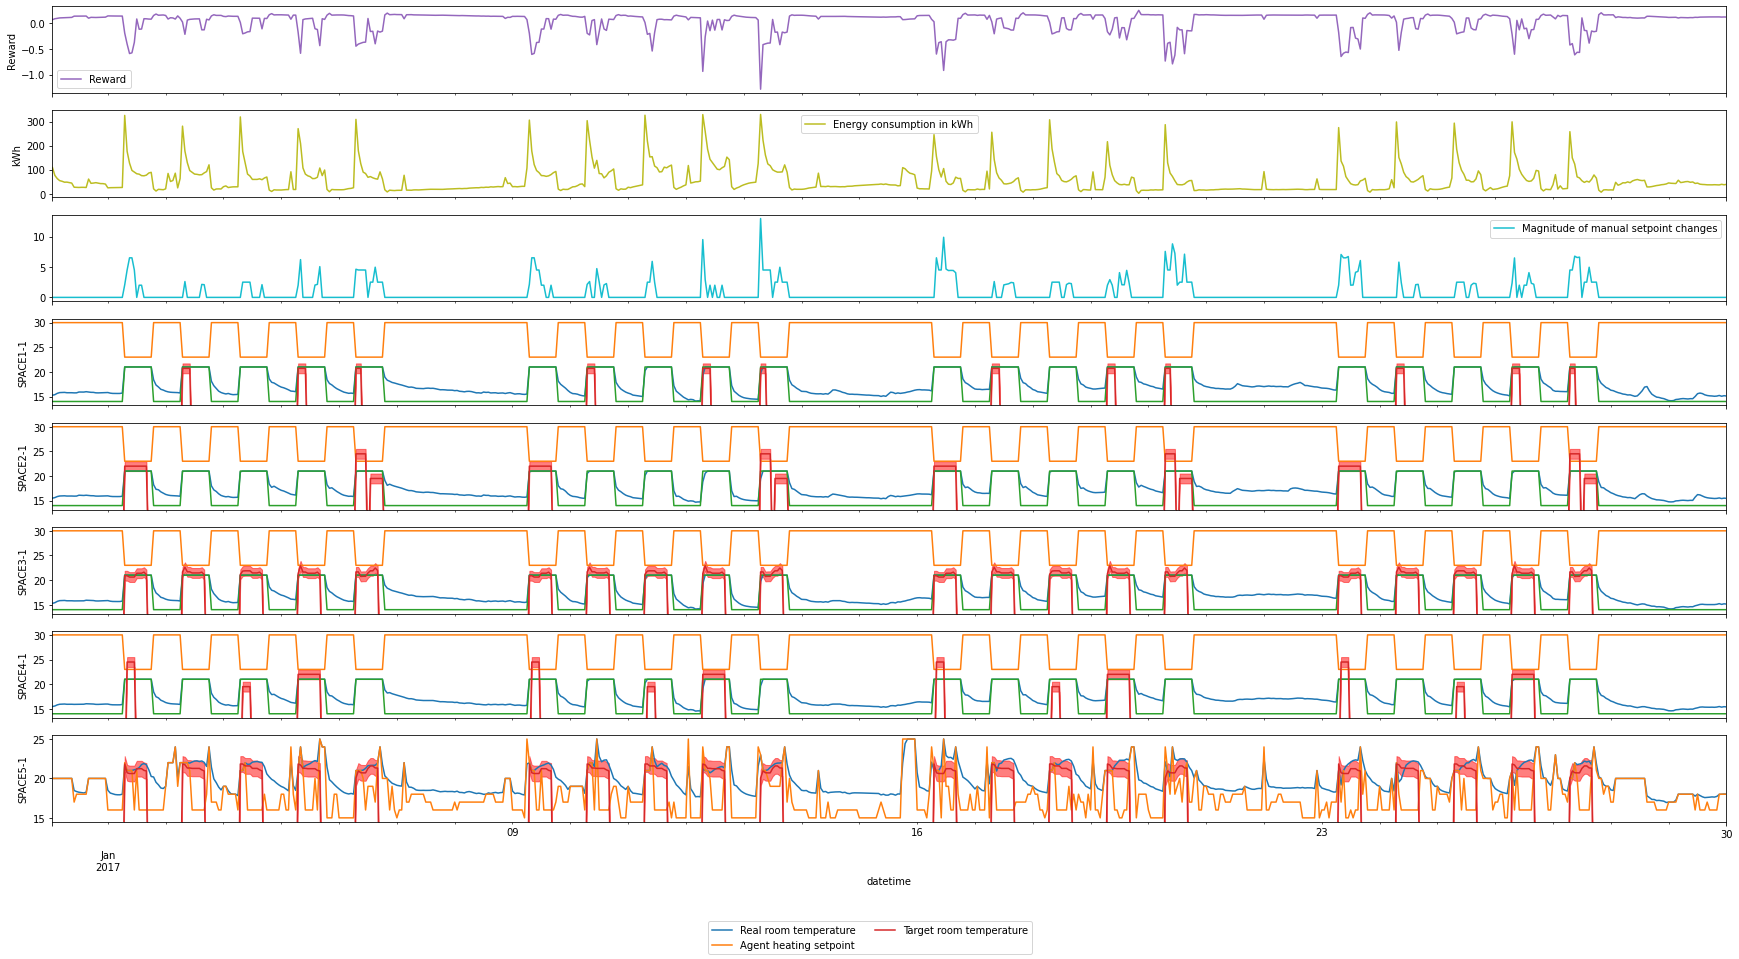

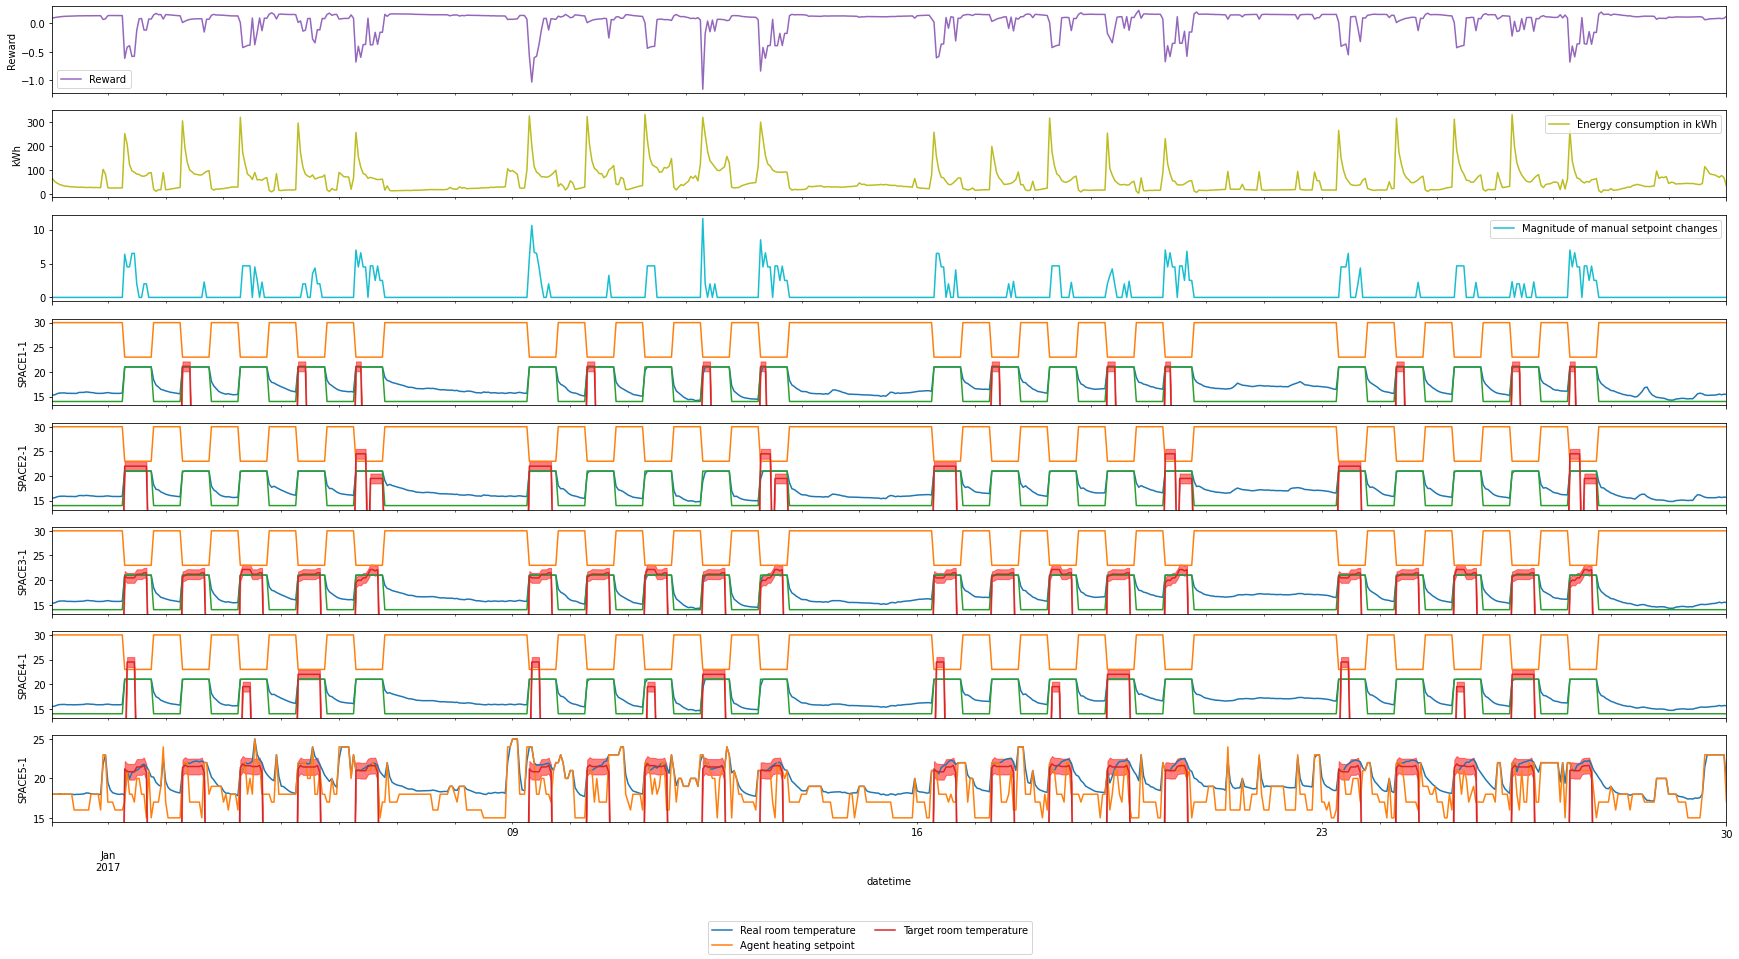

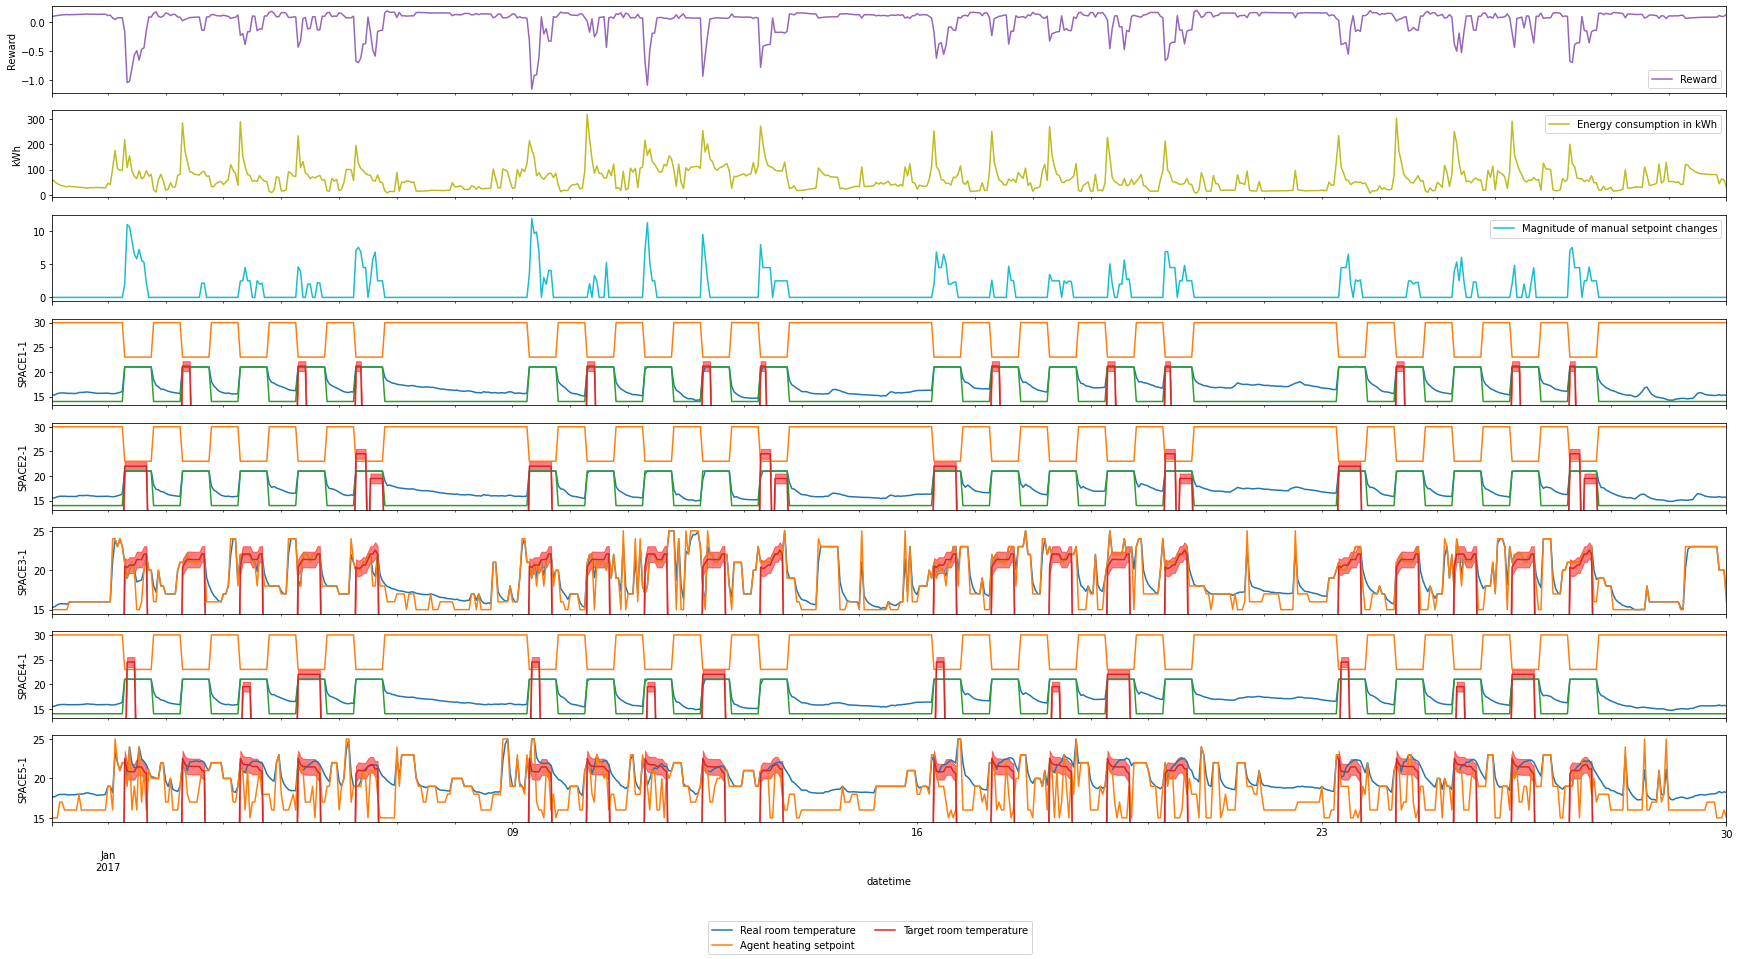

In [32]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

No q-values available for scenario 1: s161, agent 1
No q-values available for scenario 1: s161, agent 2
No q-values available for scenario 1: s161, agent 3
No q-values available for scenario 1: s161, agent 4
No q-values available for scenario 2: s161-longer, agent 1
No q-values available for scenario 2: s161-longer, agent 2
No q-values available for scenario 2: s161-longer, agent 3
No q-values available for scenario 2: s161-longer, agent 4
No q-values available for scenario 3: s165, agent 2
No q-values available for scenario 3: s165, agent 3
No q-values available for scenario 3: s165, agent 4


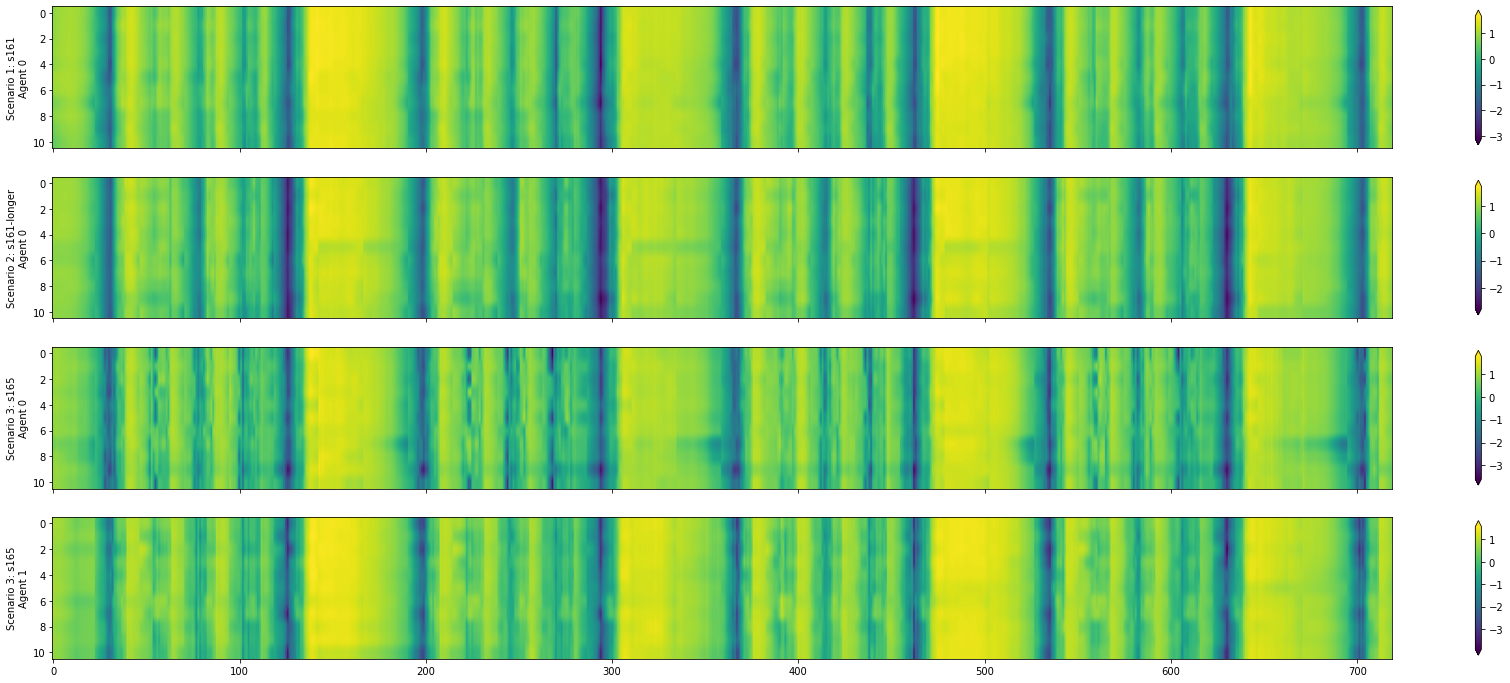

In [33]:
vh.plot_q_values(q_values, fig_width)